# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [1]:
import pandas as pd
import zipfile
import os
import requests
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(100000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(100000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UT

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [3]:
df["target"].value_counts()

target
positive    50057
negative    49943
Name: count, dtype: int64

In [4]:
df["flag"].value_counts()

flag
NO_QUERY    100000
Name: count, dtype: int64

In [5]:
df.drop(columns=["id","date","flag","user"],inplace= True)

In [6]:
df.duplicated().sum()

275

In [7]:
df.isnull().sum()

target    0
text      0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='text', ylabel='Count'>

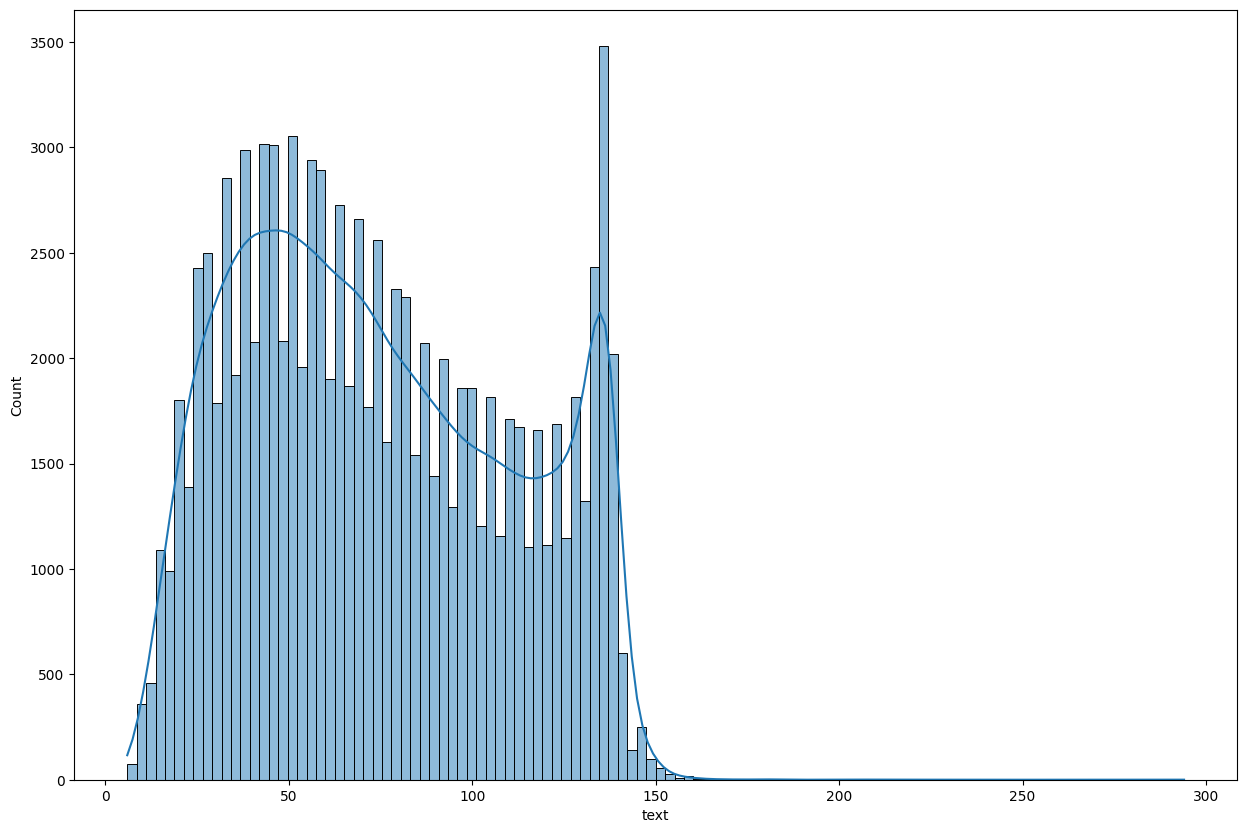

In [8]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['text'].apply(len),kde= True)

In [9]:
print(df[["target", "text"]].head())

     target                                               text
0  negative             @chrishasboobs AHHH I HOPE YOUR OK!!! 
1  negative  @misstoriblack cool , i have no tweet apps  fo...
2  negative  @TiannaChaos i know  just family drama. its la...
3  negative  School email won't open  and I have geography ...
4  negative                             upper airways problem 


In [10]:
nltk.download('punkt')
df["No_of_Characters"] = df["text"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 1500x1000 with 0 Axes>

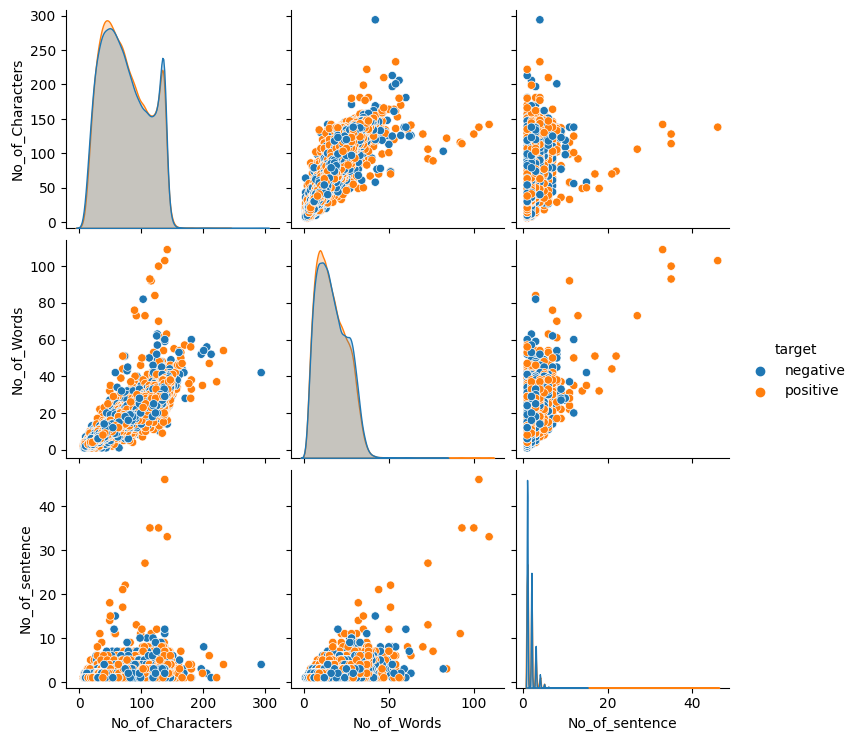

In [11]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df, hue="target")

## Here I will fix contractions like(I'm -> I am)

In [12]:
def filter(text):
    clean_text = re.sub('[^A-za-z\s]' , '',text)
    clean_text = clean_text.lower()
    return clean_text

In [13]:
df["clean_text"] = df["text"].apply(filter)
df.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,chrishasboobs ahhh i hope your ok
1,negative,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,misstoriblack cool i have no tweet apps for ...
2,negative,@TiannaChaos i know just family drama. its la...,137,30,2,tiannachaos i know just family drama its lame...
3,negative,School email won't open and I have geography ...,91,22,2,school email wont open and i have geography s...
4,negative,upper airways problem,22,3,1,upper airways problem


In [14]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 5.8 MB/s eta 0:00:00


In [15]:
import contractions
def fix(text):
    fixed_text = contractions.fix(text)
    return fixed_text

In [16]:
df["fixed_text"] = df["clean_text"].apply(fix)
df.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,fixed_text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,chrishasboobs ahhh i hope your ok,chrishasboobs ahhh i hope your ok
1,negative,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,misstoriblack cool i have no tweet apps for ...,misstoriblack cool i have no tweet apps for ...
2,negative,@TiannaChaos i know just family drama. its la...,137,30,2,tiannachaos i know just family drama its lame...,tiannachaos i know just family drama its lame...
3,negative,School email won't open and I have geography ...,91,22,2,school email wont open and i have geography s...,school email will not open and i have geograp...
4,negative,upper airways problem,22,3,1,upper airways problem,upper airways problem


In [17]:
df["tokenize_text"]=df.apply(lambda row: nltk.word_tokenize(row["fixed_text"]), axis=1)
df.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,fixed_text,tokenize_text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,chrishasboobs ahhh i hope your ok,chrishasboobs ahhh i hope your ok,"[chrishasboobs, ahhh, i, hope, your, ok]"
1,negative,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,misstoriblack cool i have no tweet apps for ...,misstoriblack cool i have no tweet apps for ...,"[misstoriblack, cool, i, have, no, tweet, apps..."
2,negative,@TiannaChaos i know just family drama. its la...,137,30,2,tiannachaos i know just family drama its lame...,tiannachaos i know just family drama its lame...,"[tiannachaos, i, know, just, family, drama, it..."
3,negative,School email won't open and I have geography ...,91,22,2,school email wont open and i have geography s...,school email will not open and i have geograp...,"[school, email, will, not, open, and, i, have,..."
4,negative,upper airways problem,22,3,1,upper airways problem,upper airways problem,"[upper, airways, problem]"


## better order is to tokenize -> Lemmatize -> remove stopwords

In [18]:
check_data = df.sample(20)
check_data.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,fixed_text,tokenize_text
62925,negative,@MzDeeva he's not worth your time if he can't...,70,19,2,mzdeeva hes not worth your time if he cant be...,mzdeeva hes not worth your time if he cannot ...,"[mzdeeva, hes, not, worth, your, time, if, he,..."
38612,positive,@ddlovato haha! you should bring dalas and mad...,135,29,4,ddlovato haha you should bring dalas and madis...,ddlovato haha you should bring dalas and madis...,"[ddlovato, haha, you, should, bring, dalas, an..."
87577,negative,oh dear. this hurts! http://tr.im/oWLV,39,9,3,oh dear this hurts httptrimowlv,oh dear this hurts httptrimowlv,"[oh, dear, this, hurts, httptrimowlv]"
23424,negative,@blayze316 Sorry to hear your jaw is giving yo...,56,14,2,blayze sorry to hear your jaw is giving you pain,blayze sorry to hear your jaw is giving you pain,"[blayze, sorry, to, hear, your, jaw, is, givin..."
14465,negative,no more tokens,15,3,1,no more tokens,no more tokens,"[no, more, tokens]"


In [19]:
porter_stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")
for doc,sen in zip(check_data["tokenize_text"],check_data["text"]):
    print(sen)
    text = " ".join(doc)
    tokens = nlp(text)
    stems = [porter_stemmer.stem(word) for word in doc]
    lemmas = [(token.text, token.lemma_) for token in tokens]
    print("NLTK Stems: ", stems)
    print("\nSPACY Lemmas: ", lemmas)

@MzDeeva  he's not worth your time if he can't be honest. boooo @ him!
NLTK Stems:  ['mzdeeva', 'he', 'not', 'worth', 'your', 'time', 'if', 'he', 'can', 'not', 'be', 'honest', 'boooo', 'him']

SPACY Lemmas:  [('mzdeeva', 'mzdeeva'), ('he', 'he'), ('s', 's'), ('not', 'not'), ('worth', 'worth'), ('your', 'your'), ('time', 'time'), ('if', 'if'), ('he', 'he'), ('can', 'can'), ('not', 'not'), ('be', 'be'), ('honest', 'honest'), ('boooo', 'boooo'), ('him', 'he')]
@ddlovato haha! you should bring dalas and madison to london  i know they'll love it in london!... cant wait to see you! topshopaholic 
NLTK Stems:  ['ddlovato', 'haha', 'you', 'should', 'bring', 'dala', 'and', 'madison', 'to', 'london', 'i', 'know', 'they', 'will', 'love', 'it', 'in', 'london', 'can', 'not', 'wait', 'to', 'see', 'you', 'topshopahol']

SPACY Lemmas:  [('ddlovato', 'ddlovato'), ('haha', 'haha'), ('you', 'you'), ('should', 'should'), ('bring', 'bring'), ('dalas', 'dala'), ('and', 'and'), ('madison', 'madison'), ('to',

## spacy is better in handling verbs like (am,is,was,were) -> be

In [20]:
def lemmatize(tok_text):
        doc= " ".join(tok_text)
        tokens = nlp(doc)
        return [token.lemma_ for token in tokens]

In [21]:
df["lemma_text"] = df["tokenize_text"].apply(lemmatize)
df.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,fixed_text,tokenize_text,lemma_text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,chrishasboobs ahhh i hope your ok,chrishasboobs ahhh i hope your ok,"[chrishasboobs, ahhh, i, hope, your, ok]","[chrishasboob, ahhh, I, hope, your, ok]"
1,negative,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,misstoriblack cool i have no tweet apps for ...,misstoriblack cool i have no tweet apps for ...,"[misstoriblack, cool, i, have, no, tweet, apps...","[misstoriblack, cool, I, have, no, tweet, app,..."
2,negative,@TiannaChaos i know just family drama. its la...,137,30,2,tiannachaos i know just family drama its lame...,tiannachaos i know just family drama its lame...,"[tiannachaos, i, know, just, family, drama, it...","[tiannachaos, I, know, just, family, drama, it..."
3,negative,School email won't open and I have geography ...,91,22,2,school email wont open and i have geography s...,school email will not open and i have geograp...,"[school, email, will, not, open, and, i, have,...","[school, email, will, not, open, and, I, have,..."
4,negative,upper airways problem,22,3,1,upper airways problem,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]"


In [22]:
df['target'] = df['target'].map({"positive": 1, "negative": 0})

In [23]:
X = df['lemma_text'].apply(lambda x: " ".join(x))
y = df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1,2))  
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [26]:
import joblib
joblib.dump(vectorizer, "tfidf.pkl")

['tfidf.pkl']

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,random_state=42)
logistic_model.fit(X_train_tf,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
joblib.dump(logistic_model, "logistic_model.pkl")

['logistic_model.pkl']

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = logistic_model.predict(X_test_tf)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
train_accuracy = logistic_model.score(X_train_tf,y_train)
test_accuracy = logistic_model.score(X_test_tf,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[7997 1992]
 [2183 7828]]
Train accuracy:  0.878775
Test accuracy:  0.79125

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      9989
           1       0.80      0.78      0.79     10011

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



In [30]:
def stemming(doc):
        return [porter_stemmer.stem(word) for word in doc]

In [31]:
df["stemming_text"] = df["tokenize_text"].apply(stemming)
df.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,fixed_text,tokenize_text,lemma_text,stemming_text
0,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,chrishasboobs ahhh i hope your ok,chrishasboobs ahhh i hope your ok,"[chrishasboobs, ahhh, i, hope, your, ok]","[chrishasboob, ahhh, I, hope, your, ok]","[chrishasboob, ahhh, i, hope, your, ok]"
1,0,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,misstoriblack cool i have no tweet apps for ...,misstoriblack cool i have no tweet apps for ...,"[misstoriblack, cool, i, have, no, tweet, apps...","[misstoriblack, cool, I, have, no, tweet, app,...","[misstoriblack, cool, i, have, no, tweet, app,..."
2,0,@TiannaChaos i know just family drama. its la...,137,30,2,tiannachaos i know just family drama its lame...,tiannachaos i know just family drama its lame...,"[tiannachaos, i, know, just, family, drama, it...","[tiannachaos, I, know, just, family, drama, it...","[tiannachao, i, know, just, famili, drama, it,..."
3,0,School email won't open and I have geography ...,91,22,2,school email wont open and i have geography s...,school email will not open and i have geograp...,"[school, email, will, not, open, and, i, have,...","[school, email, will, not, open, and, I, have,...","[school, email, will, not, open, and, i, have,..."
4,0,upper airways problem,22,3,1,upper airways problem,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]"


In [32]:
X = df['stemming_text'].apply(lambda x: " ".join(x))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1,2))  
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,random_state=42)
logistic_model.fit(X_train_tf,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = logistic_model.predict(X_test_tf)
train_accuracy = logistic_model.score(X_train_tf,y_train)
test_accuracy = logistic_model.score(X_test_tf,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Train accuracy:  0.8798
Test accuracy:  0.7935

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      9989
           1       0.80      0.79      0.79     10011

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000



almost exactly the same accuracy between stemming and lemmatization

In [37]:
nltk.download('stopwords')
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df["no_stopword_text"] = df["lemma_text"].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,fixed_text,tokenize_text,lemma_text,stemming_text,no_stopword_text
0,0,@chrishasboobs AHHH I HOPE YOUR OK!!!,38,10,2,chrishasboobs ahhh i hope your ok,chrishasboobs ahhh i hope your ok,"[chrishasboobs, ahhh, i, hope, your, ok]","[chrishasboob, ahhh, I, hope, your, ok]","[chrishasboob, ahhh, i, hope, your, ok]","[chrishasboob, ahhh, I, hope, ok]"
1,0,"@misstoriblack cool , i have no tweet apps fo...",57,13,1,misstoriblack cool i have no tweet apps for ...,misstoriblack cool i have no tweet apps for ...,"[misstoriblack, cool, i, have, no, tweet, apps...","[misstoriblack, cool, I, have, no, tweet, app,...","[misstoriblack, cool, i, have, no, tweet, app,...","[misstoriblack, cool, I, tweet, app, razr]"
2,0,@TiannaChaos i know just family drama. its la...,137,30,2,tiannachaos i know just family drama its lame...,tiannachaos i know just family drama its lame...,"[tiannachaos, i, know, just, family, drama, it...","[tiannachaos, I, know, just, family, drama, it...","[tiannachao, i, know, just, famili, drama, it,...","[tiannachaos, I, know, family, drama, lamehey,..."
3,0,School email won't open and I have geography ...,91,22,2,school email wont open and i have geography s...,school email will not open and i have geograp...,"[school, email, will, not, open, and, i, have,...","[school, email, will, not, open, and, I, have,...","[school, email, will, not, open, and, i, have,...","[school, email, open, I, geography, stuff, rev..."
4,0,upper airways problem,22,3,1,upper airways problem,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]","[upper, airway, problem]"


## After doing the Lemmatization I have observed that there are meaningfull meanings lost from apostrophes like (I'm , don't,..) so to fix this I will expand contractions before doing regex cleaning

In [ ]:
def pos(text):
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs  = sum(1 for token in doc if token.pos_ == "ADJ")
    return pd.Series([nouns, verbs, adjs])

df[["noun_count", "verb_count", "adj_count"]] = df["clean_text"].apply(pos)
df.head()

In [ ]:
df['ready_text'] = df['no_stopword_text'].apply(lambda x: " ".join(x))
df.head()

In [ ]:
X = df.drop(columns= ['target','text','clean_text','fixed_text','tokenize_text','lemma_text','stemming_text','no_stopword_text'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42) 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, ngram_range=(1,2))  
X_train_tf = vectorizer.fit_transform(X_train['ready_text'])
X_test_tf = vectorizer.transform(X_test['ready_text'])

turn dataframe into sparse matrix for effiecincy

In [ ]:
from scipy.sparse import hstack

X_train = X_train.drop(columns=["ready_text"]).values
X_test = X_test.drop(columns=["ready_text"]).values

X_train_all = hstack([X_train_tf, X_train])
X_test_all = hstack([X_test_tf, X_test])

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000,random_state=42)
logistic_model.fit(X_train_all,y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
predictions = logistic_model.predict(X_test_all)
train_accuracy = logistic_model.score(X_train_all,y_train)
test_accuracy = logistic_model.score(X_test_all,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

without pos and numerical features is slightly better

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
X = df["ready_text"]

count_vec = CountVectorizer(max_df=0.95, ngram_range=(1,1))
X_bow = count_vec.fit_transform(X)

print("Bag of Words: \n")
print("Vocabulary size: ", len(count_vec.vocabulary_))
print("Shape: ", X_bow.shape)

In [ ]:
tfidf_vec = TfidfVectorizer(max_df=0.95, ngram_range=(1,2))
X_tfidf = tfidf_vec.fit_transform(X)

print("TF-IDF: \n")
print("Vocabulary size:", len(tfidf_vec.vocabulary_))
print("Shape:", X_tfidf.shape)

In [ ]:
!pip install gensim
from gensim.models import Word2Vec

In [ ]:
sentences = [row.split() for row in X]
skipgram_model = Word2Vec(
    sentences,
    vector_size=100,
    window=2,
    min_count=2,
    epochs=15,
    sg=1
)

choosing skip-gram instead of cbow as it is better for rare words 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from gensim.models import Word2Vec

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
X = df
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(sublinear_tf=True,min_df=5, max_df=0.95, ngram_range=(1,2)), "ready_text")
    ]
)

best_pipeline = Pipeline([
    ("features", preprocessor),
    ("clf",  LinearSVC(C=0.1,class_weight="balanced"))
])

best_pipeline.fit(X_train, y_train)
predictions = best_pipeline.predict(X_test)
train_accuracy = best_pipeline.score(X_train,y_train)
test_accuracy = best_pipeline.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

best performance of all

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("text", CountVectorizer(max_features=50000,max_df=0.95, ngram_range=(1,2)), "ready_text")
    ]
)

pipeline = Pipeline([
    ("features", preprocessor),
    ("clf",  LinearSVC(C=0.01,class_weight="balanced"))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
train_accuracy = pipeline.score(X_train,y_train)
test_accuracy = pipeline.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("text", CountVectorizer(max_features=50000,max_df=0.95, ngram_range=(1,3)), "ready_text")
    ]
)

pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, C=0.1))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
train_accuracy = pipeline.score(X_train,y_train)
test_accuracy = pipeline.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(min_df=5, max_df=0.95, ngram_range=(1,3)), "ready_text")
    ]
)

pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, C=0.1))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
train_accuracy = pipeline.score(X_train,y_train)
test_accuracy = pipeline.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("text", CountVectorizer(max_features=50000,max_df=0.95, ngram_range=(1,3)), "ready_text")
    ]
)

pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", MultinomialNB(alpha=2.0))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
train_accuracy = pipeline.score(X_train,y_train)
test_accuracy = pipeline.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(min_df=5, max_df=0.95, ngram_range=(1,3)), "ready_text")
    ]
)

pipeline = Pipeline([
    ("features", preprocessor),
    ("clf", MultinomialNB(alpha=2.0))
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
train_accuracy = pipeline.score(X_train,y_train)
test_accuracy = pipeline.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
sentences = [row.split() for row in X_train]
skipgram_model = Word2Vec(
    sentences=sentences,
    vector_size=150,
    window=3,
    min_count=2,
    sg=1,
    epochs=20
)

def get_avg_vector(tokens, model, vector_size):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

X_w2v = np.vstack([get_avg_vector(s.split(), skipgram_model, 150) for s in X])
X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, y, test_size=0.2, stratify=y, random_state=42
)

logistic_model = LogisticRegression(max_iter=1000,random_state= 42)
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
train_accuracy = logistic_model.score(X_train,y_train)
test_accuracy = logistic_model.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
sentences = [row.split() for row in X_train]
skipgram_model = Word2Vec(
    sentences=sentences,
    vector_size=150,
    window=3,
    min_count=2,
    sg=1,
    epochs=20
)

def get_avg_vector(tokens, model, vector_size):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

X_w2v = np.vstack([get_avg_vector(s.split(), skipgram_model, 150) for s in X])
X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, y, test_size=0.2, stratify=y, random_state=42
)

svm = LinearSVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
train_accuracy = svm.score(X_train,y_train)
test_accuracy = svm.score(X_test,y_test)
print("Train accuracy: ",train_accuracy)
print("Test accuracy: ",test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from gensim.models import Word2Vec

# ==========================
# 1. Split Data
# ==========================
X = df["ready_text"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==========================
# 2. Helper function for evaluation
# ==========================
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, name, results):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results.append({
        "Vectorizer": name,
        "Model": pipeline.steps[-1][1].__class__.__name__,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })
    return results

results = []

# ==========================
# 3. CountVectorizer models
# ==========================
for clf in [LogisticRegression(max_iter=1000), LinearSVC(), MultinomialNB()]:
    bow_pipeline = Pipeline([
        ("vectorizer", CountVectorizer(max_df=0.95, ngram_range=(1,2))),
        ("clf", clf)
    ])
    results = evaluate_model(bow_pipeline, X_train, X_test, y_train, y_test, "Bag-of-Words", results)

# ==========================
# 4. TF-IDF models
# ==========================
for clf in [LogisticRegression(max_iter=1000), LinearSVC(), MultinomialNB()]:
    tfidf_pipeline = Pipeline([
        ("vectorizer", TfidfVectorizer(max_df=0.95, ngram_range=(1,2))),
        ("clf", clf)
    ])
    results = evaluate_model(tfidf_pipeline, X_train, X_test, y_train, y_test, "TF-IDF", results)

# ==========================
# 5. Word2Vec models
# ==========================
# Train Skip-Gram Word2Vec on training data
sentences = [row.split() for row in X_train]
skipgram_model = Word2Vec(
    sentences=sentences,
    vector_size=150,
    window=3,
    min_count=2,
    sg=1,
    epochs=20
)

# Average embeddings
def get_avg_vector(tokens, model, vector_size):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

X_w2v = np.vstack([get_avg_vector(s.split(), skipgram_model, 150) for s in X])
X_train, X_test, y_train, y_test = train_test_split(
    X_w2v, y, test_size=0.2, stratify=y, random_state=42
)

for clf in [LogisticRegression(max_iter=1000), LinearSVC()]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append({
        "Vectorizer": "Word2Vec",
        "Model": clf.__class__.__name__,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

# ==========================
# 6. Show results
# ==========================
results_df = pd.DataFrame(results)
print(results_df)


## Final choices:
Model: Logistic Regression

Vectorizer: TF_IDF

Preprocessing:regex cleaning, contraction fixing, tokenization, lemmatization